In [15]:
from urllib.request import Request, urlopen
import requests
from bs4 import BeautifulSoup
import time
import pandas as pd
import re
import random
import seaborn as sns
import statsmodels.formula.api as sm
import ssl

In [11]:
# WARNING: DO NOT REPEATEDLY RUN THIS CELL. DOING SO MAY HAVE US BLOCKED FROM THE WEBSITE
page_count = 285 # number of pages to scrape from (each page has 20 reviews)
coffee_df = pd.DataFrame()
counter = 0

for page in range(1, 16):
    
    url = "https://www.coffeereview.com/review/page/" + str(page) +  "/?locations=na"
    print("Opening page URL:", url)

    ssl._create_default_https_context = ssl._create_unverified_context
    req = Request(url, headers={'User-Agent': 'Mozilla/5.0'})
    html = urlopen(req).read()

    soup = BeautifulSoup(html, 'html.parser')

    time.sleep(random.uniform(2, 4)) # DELAY NEEDED TO AVOID GETTING BLOCKED
    
    for curr_review in soup.find_all(class_="review-template"):

        review_url = curr_review.find_all('a', href=True)[1]['href']
        #print("Opening review URL:", review_url)

        review_req = Request(review_url, headers={'User-Agent': 'Mozilla/5.0'})
        review_html = urlopen(review_req).read()

        review_soup = BeautifulSoup(review_html, 'html.parser')

        time.sleep(random.uniform(1, 2.5)) # DELAY NEEDED TO AVOID GETTING BLOCKED

        attributes = {}

        roaster = curr_review.find("p", class_="review-roaster").get_text()
        attributes["Roaster"] = roaster

        name = review_soup.find("h1", class_="review-title").get_text()
        attributes["Name"] = name

        rating = review_soup.find('span', class_="review-template-rating").get_text()
        attributes["Rating"] = rating

        i = 1
        curr_attribute = ""
        for tag in review_soup.find_all(class_="review-template-table")[0].find_all('td'):
            if i % 2 == 1:
                curr_attribute = tag.get_text()[:-1]
            else:
                attributes[curr_attribute] = tag.get_text()
            i = i + 1

        i = 1
        curr_attribute = ""
        for tag in review_soup.find_all(class_="review-template-table")[1].find_all('td'):
            if i % 2 == 1:
                curr_attribute = tag.get_text()[:-1]
            else:
                value = re.sub('\s+', '', tag.get_text())
                attributes[curr_attribute] = value
            i = i + 1 

        # Append all attributes of this review to the dataframe
        coffee_df = coffee_df.append(attributes, ignore_index=True)

        counter = counter + 1
    
print("DONE")
coffee_df

Opening page URL: https://www.coffeereview.com/review/page/1/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/2/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/3/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/4/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/5/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/6/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/7/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/8/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/9/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/10/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/11/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/12/?locations=na
Opening page URL: https://www.coffeereview.com/review/page/13/?locations=na
Opening page URL: htt

,Roaster,Name,Rating,Roaster Location,Coffee Origin,Roast Level,Agtron,Est. Price,Review Date,Aroma,Acidity/Structure,Body,Flavor,Aftertaste,With Milk,Acidity
0,JBC Coffee Roasters,Lugmapata Ecuador,95,"Madison, Wisconsin","Pallatanga, Chimborazo Province, Ecuador",Medium-Light,60/80,$18.00/8 ounces,March2022,9,9,9,9,9,NaN,NaN
1,Nostalgia Coffee Roasters,Red Sunset by Andres Cardona,94,"San Diego, California","Santa Bárbara, Antioquia Department, Colombia",Medium-Light,55/73,$24.00/12 ounces,March2022,9,9,9,9,8,NaN,NaN
2,JBC Coffee Roasters,Macarena Colombia,94,"Madison, Wisconsin","Piendamó, Cauca Department, Colombia",Medium-Light,60/78,$18.00/8 ounces,March2022,9,9,9,9,8,NaN,NaN
3,JBC Coffee Roasters,Haraaz Red Yemen,94,"Madison, Wisconsin","Al Mashtal ul Burhani, Yemen",Medium-Light,58/78,$25.00/8 ounces,March2022,9,9,9,9,8,NaN,NaN
4,Nostalgia Coffee Roasters,Nicaragua Sabino Maria,93,"San Diego, California","Jinotega Department, Nicaragua",Medium-Light,58/78,$21.00/12 ounces,March2022,9,9,8,9,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Red Rooster Coffee Roaster,Ethiopia Tibe Haro Uraga,95,"Floyd, Virginia","Uraga District, Guji Zone, Ethiopia",Medium-Light,58/78,$20.49/12 ounces,June2021,9,9,9,9,9,NaN,NaN
296,Theory Coffee Roasters,Ethiopia Keramo Village,94,"Redding, California","Sidamo growing region, south-central Ethiopia",Medium-Light,60/77,$30.00/300 grams,June2021,9,9,9,9,8,NaN,NaN
297,RamsHead Coffee Roasters,Ethiopia Uraga Washed G1,94,"Bozeman, Montana","Guji Zone, Oromia Region, southern Ethiopia",Medium-Light,58/78,$17.95/12 ounces,May2021,9,9,9,9,8,NaN,NaN
298,Jackrabbit Java,Rwanda Nyruzisa Station,92,"Thermopolis, Wyoming","Nyamagabe District, Southern Province, Rwanda",Medium-Light,60/78,$14.00/12 ounces,May2021,9,8,8,9,8,NaN,NaN


In [26]:
coffee_df["Agtron"] = coffee_df["Agtron"].str.slice(0, 2, 1)

change_type = {'Rating': int,
    'Aroma': int,
    'Body': int,
    'Flavor': int,
    'Aftertaste': int,
   
              }

coffee_df = coffee_df.astype(change_type)

coffee_df.describe()

0       60
1       55
2       60
3       58
4       58
      ... 
295     58
296     60
297     58
298    NaN
299    NaN
Name: Agtron, Length: 300, dtype: object


,Rating,Aroma,Body,Flavor,Aftertaste
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,93.146667,8.863333,8.653333,8.953333,8.146667
std,1.761296,0.380972,0.517088,0.362759,0.528602
min,86.000000,7.000000,7.000000,7.000000,7.000000
25%,92.000000,9.000000,8.000000,9.000000,8.000000
50%,93.000000,9.000000,9.000000,9.000000,8.000000
75%,94.000000,9.000000,9.000000,9.000000,8.000000
max,97.000000,10.000000,9.000000,10.000000,9.000000


In [13]:
coffee_df.corr()

,Rating,Aroma,Body,Flavor,Aftertaste
Rating,1.000000,0.697868,0.720691,0.759287,0.756338
Aroma,0.697868,1.000000,0.386859,0.607101,0.348981
Body,0.720691,0.386859,1.000000,0.430530,0.406884
Flavor,0.759287,0.607101,0.430530,1.000000,0.506731
Aftertaste,0.756338,0.348981,0.406884,0.506731,1.000000


<AxesSubplot:>

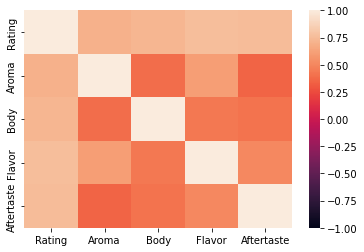

In [14]:
sns.heatmap(data = coffee_df.corr(), vmin = -1, vmax = 1)

In [16]:
rating_ols = sm.ols(formula="Rating ~ Aroma + Body + Flavor + Aftertaste", data=coffee_df).fit()
rating_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Rating   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     939.5
Date:                Thu, 17 Mar 2022   Prob (F-statistic):          1.96e-166
Time:                        22:31:08   Log-Likelihood:                -201.97
No. Observations:                 300   AIC:                             413.9
Df Residuals:                     295   BIC:                             432.5
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.2801      0.756     66.514      0.000      48.792      51.768
Aroma          1.2945      0.093     13.943      0.000       1.112       1.477
Body           1.1872      0.062     19.162      0.000       1.065       1.309
Flavor         1.1586      0.106     10.936      0.000       0.950       1.367
Aftertaste     1.3191      0.063     21.075      0.000       1.196       1.442
==============================================================================
Omnibus:                        6.116   Durbin-Watson:                   1.946
Prob(Omnibus):                  0.047   Jarque-Bera (JB):                6.280
Skew:                          -0.347   Prob(JB):                       0.0433
Kurtosis:                       2.856   Cond. No.                         476.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
coffee_df["Agtron"] = coffee_df["Agtron"].str.slice(0, 2, 1)
change_type = {'Agtron': int }
coffee_df = coffee_df.astype(change_type)


0       60
1       55
2       60
3       58
4       58
      ... 
295     58
296     60
297     58
298    NaN
299    NaN
Name: Agtron, Length: 300, dtype: object